In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
data= pd.read_csv('data.csv',header=None,names=['population','profit'])

In [0]:
print(data.head(10))

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166


In [0]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


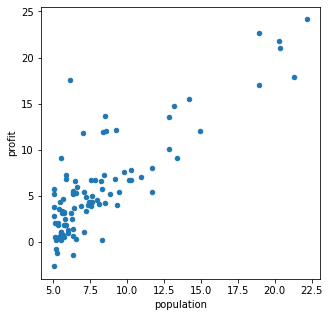

In [0]:
data.plot(kind='scatter',x='population',y='profit',figsize=(5,5))

##  We will add a column with ones to be x1 (for bias)

In [0]:
data.insert(0,'ones',1)

In [0]:
data.head(10)

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


## Features and Labels seperation

In [0]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [0]:
 # we can convert from dataframe to numpy matrix by np.matix(x.values)
#x_features= np.matrix(x_features)
#y_features=np.matrix(y_features)

In [0]:
x = np.matrix(x.values)
y = np.matrix(y.values)

## Normalization

In [0]:
def normalize(h):
  return (h-h.mean())/ (h.max()-h.min())

In [0]:
#x_features=normalize(x_features)
#y_features=normalize(y_features)

## We will make a zeros matrix for thetas

In [0]:
theta= np.matrix(np.array([0,0]))
theta.shape

(1, 2)

## Cost Function
#### to get y_pred you have to multiply x to thetas (transpose)

In [0]:
def costfunc(X_,Y_,Theta):
  y_pred= X_*Theta.T
  z= np.power((y_pred-Y_),2)
  J= np.sum(z) / (2 * len(X_))
  return J


In [0]:
#computeCost(x_features,y_features,theta)

In [0]:
costfunc(x,y,theta)

32.072733877455676

## Gradient Decent

In [0]:
def grdecnfunc (X,Y,Theta,alpha,iters):
  # create a temporary matrix for thetas with the same shape
  temp= np.matrix(np.zeros(Theta.shape))
  #get the number of features/parameters from theta shape (the column)
  parameters = int(Theta.ravel().shape[1])
  #create a cost matrix for cost values with inatial values of zeros.
  Cost = np.zeros(iters)
  
  for i in range(iters):
    error = (X * Theta.T) - Y

    #calculate the thetas for this iteration
    for j in range (parameters):
      #point to each x (feature) like this x_n = X[ : , j ]
      #to get the multiply the error to /x   as the equation state
      term = np.multiply ( error ,X[ : , j ])
    
      # to complete the gradient decent equqtion and re assigne each theta 
      #first point to each theta 
      #second re assigne the selected theta into the temp matrix
      temp[0,j] = Theta[0,j]- ((alpha/ len(X)) * np.sum(term))

      #finally assigne the generated temp thetas to the original thetas
    Theta= temp
    Cost[i] = costfunc(X,Y,Theta)

  return Theta, Cost  



###Assume alpha and iterations number
 

In [0]:
Alpha= 0.01
iterations= 1500

## Run the model

In [0]:
thetas,cost_ = grdecnfunc(x,y,theta,Alpha,iterations)

In [0]:
thetas

matrix([[-3.63029144,  1.16636235]])

In [0]:
costfunc (x,y,thetas)

4.483388256587726

In [0]:
cost_

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

In [0]:
line= thetas[0,0] + (thetas[0,1] * x)

Text(0.5, 1.0, 'YearsExperience Vs. Salary ')

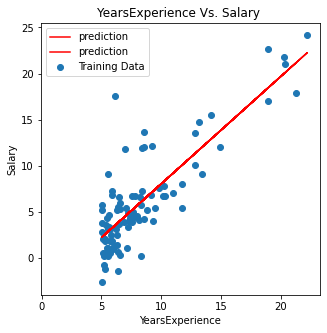

In [0]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x,line,'r',label='prediction')
ax.scatter(data.population,data.profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.set_title('YearsExperience Vs. Salary ')

Text(0.5, 1.0, 'Iterations Vs. cost ')

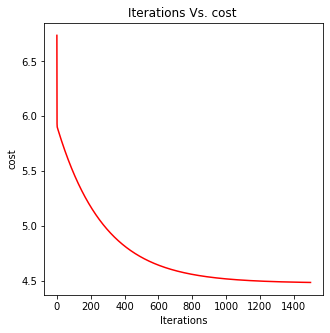

In [0]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations),cost_,'r',label='prediction')

ax.set_xlabel('Iterations')
ax.set_ylabel('cost')
ax.set_title('Iterations Vs. cost ')